In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon
import warnings

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'
warnings.filterwarnings( "ignore", module = "seaborn/*" )

In [2]:
both_kat_amps=pd.read_csv('kataegis_amplicon_PCAWG_HMF_analysis_ready_08162023.csv')

In [3]:
both_kat_amps['amplicon_classification'] =both_kat_amps['amplicon_classification'].str.replace('Non-ecDNA','ChrAmp')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Advanced_Has oncogene v.s. Advanced_No oncogene: Mann-Whitney-Wilcoxon test two-sided, P_val=2.108e-39 U_stat=2.332e+05
Primary_Has oncogene v.s. Primary_No oncogene: Mann-Whitney-Wilcoxon test two-sided, P_val=5.938e-12 U_stat=2.998e+04
Primary_Has oncogene v.s. Advanced_Has oncogene: Mann-Whitney-Wilcoxon test two-sided, P_val=5.320e-03 U_stat=1.320e+05
Primary_No oncogene v.s. Advanced_No oncogene: Mann-Whitney-Wilcoxon test two-sided, P_val=2.521e-01 U_stat=2.498e+04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Advanced_Has oncogene v.s. Advanced_No oncogene: Mann-Whitney-Wilcoxon test two-sided, P_val=5.261e-39 U_stat=2.068e+06
Primary_Has oncogene v.s. Primary_No oncogene: Mann-Whitney-Wilcoxon test tw

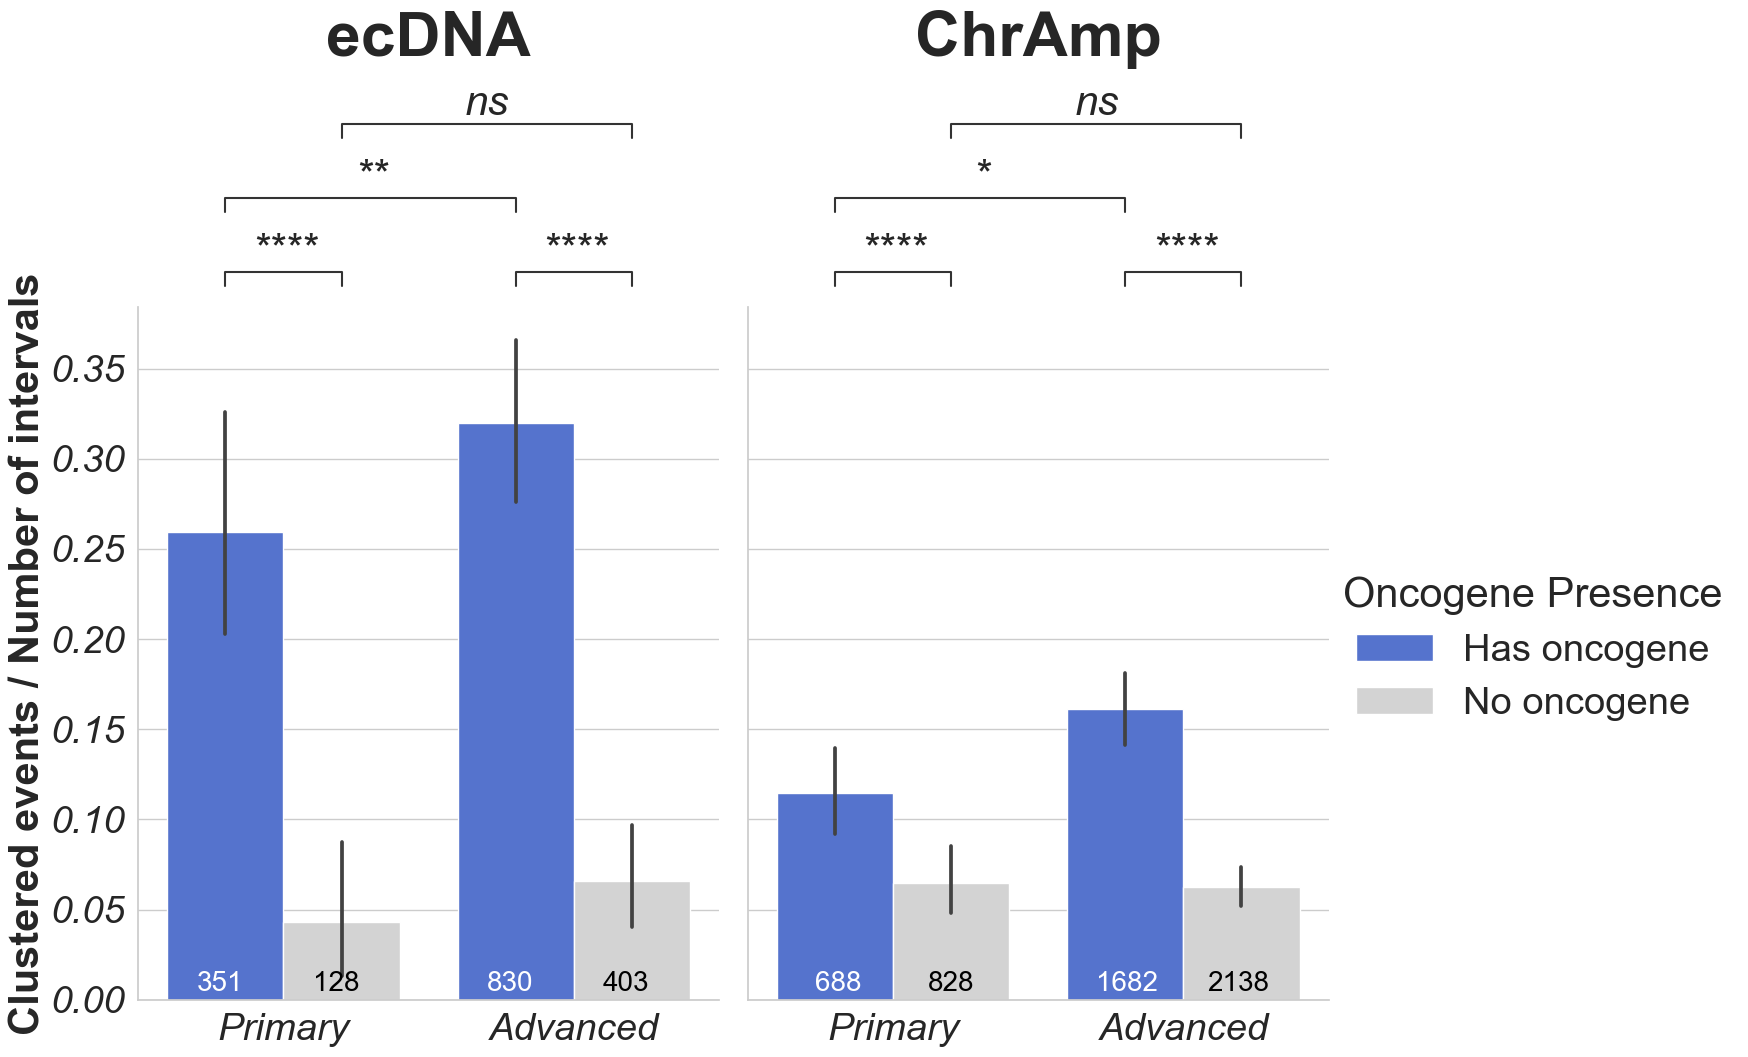

In [4]:
plt.rcParams["font.family"] = "Arial"
sns.set(font="Arial",font_scale=2.5,style="whitegrid")

data=both_kat_amps[(both_kat_amps['tissue_matched_primary_advanced']=='matched_tissue')&\
                  (both_kat_amps['kataegis_success']=='success')] 

order=['Primary','Advanced']
hue_order=['Has oncogene','No oncogene']
hue='amplicon_has_oncogene2'

# define custom plotting function
def custom_barplot(*args, **kwargs):
    ax = sns.barplot(*args, **kwargs)
    
    statannot.add_stat_annotation(

        ax, plot='barplot',
        data=kwargs['data'], x=kwargs['x'], y=kwargs['y'],
        box_pairs =[ (('Primary', 'Has oncogene'), ('Advanced', 'Has oncogene')) ,(('Primary', 'No oncogene'), ('Advanced', 'No oncogene')),
                     (('Primary', 'Has oncogene'), ('Primary', 'No oncogene')),
                     (('Advanced', 'Has oncogene'), ('Advanced', 'No oncogene')),

                   ],
        test='Mann-Whitney', text_format='star',
        hue=hue,
        hue_order=hue_order,
        comparisons_correction=None,
        loc='outside',
        order=order

    )

plt.rcParams['font.style'] = 'italic'


g = sns.FacetGrid(data, col="amplicon_classification",gridspec_kws={"wspace":0.05},col_order=['ecDNA', 'ChrAmp'],margin_titles=False,sharey=True,sharex=True, height=9, aspect=0.8)

g.map_dataframe(custom_barplot, x='source',y='n_kataegis/n_interval',hue=hue,order=order, hue_order=hue_order, palette=['royalblue','lightgrey'])

sns.set(font="Arial",font_scale=2.5,style="whitegrid"),
g.set_ylabels('Clustered events / Number of intervals',labelpad=2,fontdict={'fontname': 'Arial', 'style': 'normal','fontweight': 'bold'}) 
 

axes = g.axes.flatten()
axes[0].set_title("ecDNA",y=1.35, fontdict={'fontname': 'Arial', 'style': 'normal','fontweight': 'bold'},fontsize=45)
axes[1].set_title("ChrAmp",y=1.35, fontdict={'fontname': 'Arial', 'style': 'normal','fontweight': 'bold'},fontsize=45)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.rcParams['font.style'] = 'normal'
g.add_legend(title="Oncogene Presence",loc='center right', bbox_to_anchor=(1, 0.5))

plt.text(-2.4,0.005,'351', fontsize = 20,fontweight='normal',fontstyle='normal',color='white')
plt.text(-2,0.005,'128', fontsize = 20,fontweight='normal',fontstyle='normal',color='black')
plt.text(-1.4,0.005,'830', fontsize = 20,fontweight='normal',fontstyle='normal',color='white')
plt.text(-1.,0.005,'403', fontsize = 20,fontweight='normal',fontstyle='normal',color='black')

plt.text(-0.27,0.005,'688', fontsize = 20,fontweight='normal',fontstyle='normal',color='white')
plt.text(0.12,0.005,'828', fontsize = 20,fontweight='normal',fontstyle='normal',color='black')
plt.text(0.7,0.005,'1682', fontsize = 20,fontweight='normal',fontstyle='normal',color='white')
plt.text(1.08,0.005,'2138', fontsize = 20,fontweight='normal',fontstyle='normal',color='black')

plt.show()

#g.savefig("/images/pngs/Fig1F.png", format="png", bbox_inches="tight",dpi=1200)
#g.savefig("/images/pdfs/Fig1F.pdf", format="pdf", bbox_inches="tight",dpi=1200)


In [5]:
both_kat_amps[(both_kat_amps['tissue_matched_primary_advanced']=='matched_tissue')&\
                  (both_kat_amps['kataegis_success']=='success')]\
.groupby(['amplicon_classification','source','amplicon_has_oncogene']).count()


amplicon_barcode  \
amplicon_classification source   amplicon_has_oncogene                     
ChrAmp                  Advanced Has_oncogene                       1682   
                                 No_oncogene                        2138   
                        Primary  Has_oncogene                        688   
                                 No_oncogene                         828   
ecDNA                   Advanced Has_oncogene                        830   
                                 No_oncogene                         403   
                        Primary  Has_oncogene                        351   
                                 No_oncogene                         128   

                                                        aa_barcode  study  \
amplicon_classification source   amplicon_has_oncogene                      
ChrAmp                  Advanced Has_oncogene                 1682   1682   
                                 No_oncogene                  2138   2138   
                        Primary  Has_oncogene                  688    688   
                                 No_oncogene                   828    828   
ecDNA                   Advanced Has_oncogene                  830    830   
                                 No_oncogene                   403    403   
                        Primary  Has_oncogene                  351    351   
                                 No_oncogene                   128    128   

                                                        num_kataegis  \
amplicon_classification source   amplicon_has_oncogene                 
ChrAmp                  Advanced Has_oncogene                   1682   
                                 No_oncogene                    2138   
                        Primary  Has_oncogene                    688   
                                 No_oncogene                     828   
ecDNA                   Advanced Has_oncogene                    830   
                                 No_oncogene                     403   
                        Primary  Has_oncogene                    351   
                                 No_oncogene                     128   

                                                        group_kataegis  \
amplicon_classification source   amplicon_has_oncogene                   
ChrAmp                  Advanced Has_oncogene                     1682   
                                 No_oncogene                      2138   
                        Primary  Has_oncogene                      688   
                                 No_oncogene                       828   
ecDNA                   Advanced Has_oncogene                      830   
                                 No_oncogene                       403   
                        Primary  Has_oncogene                      351   
                                 No_oncogene                       128   

                                                        kataegis_success  \
amplicon_classification source   amplicon_has_oncogene                     
ChrAmp                  Advanced Has_oncogene                       1682   
                                 No_oncogene                        2138   
                        Primary  Has_oncogene                        688   
                                 No_oncogene                         828   
ecDNA                   Advanced Has_oncogene                        830   
                                 No_oncogene                         403   
                        Primary  Has_oncogene                        351   
                                 No_oncogene                         128   

                                                        tissue_matched_primary_advanced  \
amplicon_classification source   amplicon_has_oncogene                                    
ChrAmp                  Advanced Has_oncogene                                      1682   
                            